In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [9]:
data = pd.read_csv('Car_sales.csv', sep=",")

In [10]:
data.shape

(157, 16)

In [11]:
data.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [12]:
data.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            2
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [13]:
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,NaN,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [14]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 157


In [15]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((157, 16), (157, 4))

In [16]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((157, 16), (115, 16))

In [32]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,0.00,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,0.000000
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [19]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка __year_resale_value. Тип данных float64. Количество пустых значений 36, 22.93%.
Колонка Price_in_thousands. Тип данных float64. Количество пустых значений 2, 1.27%.
Колонка Engine_size. Тип данных float64. Количество пустых значений 1, 0.64%.
Колонка Horsepower. Тип данных float64. Количество пустых значений 1, 0.64%.
Колонка Wheelbase. Тип данных float64. Количество пустых значений 1, 0.64%.
Колонка Width. Тип данных float64. Количество пустых значений 1, 0.64%.
Колонка Length. Тип данных float64. Количество пустых значений 1, 0.64%.
Колонка Curb_weight. Тип данных float64. Количество пустых значений 2, 1.27%.
Колонка Fuel_capacity. Тип данных float64. Количество пустых значений 1, 0.64%.
Колонка Fuel_efficiency. Тип данных float64. Количество пустых значений 3, 1.91%.
Колонка Power_perf_factor. Тип данных float64. Количество пустых значений 2, 1.27%.


In [20]:
data_num = data[num_cols]
data_num

,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...
152,NaN,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,NaN,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,NaN,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,NaN,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


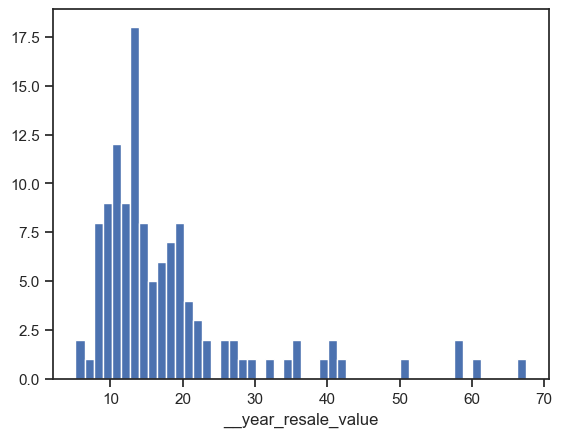

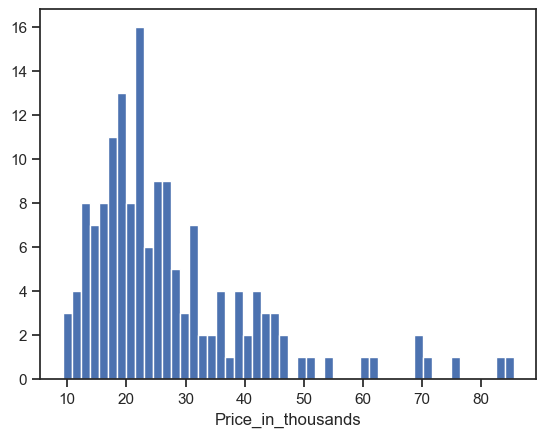

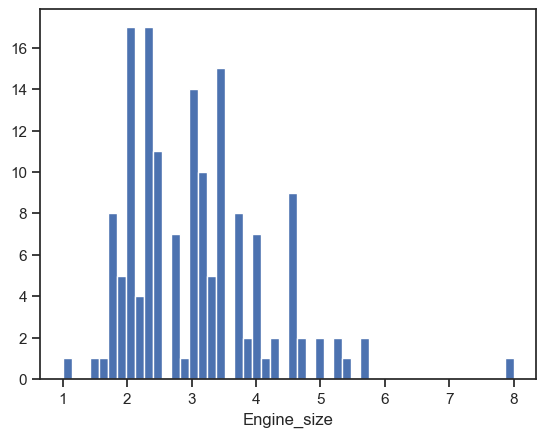

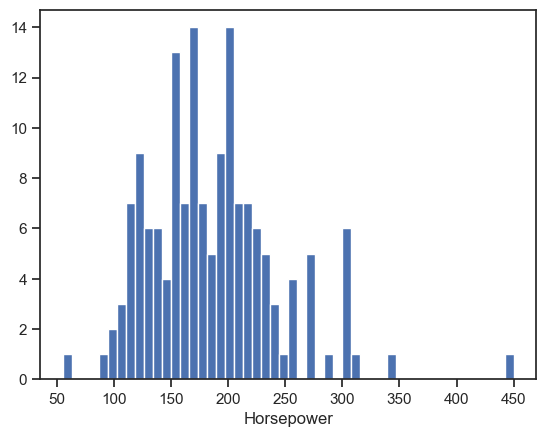

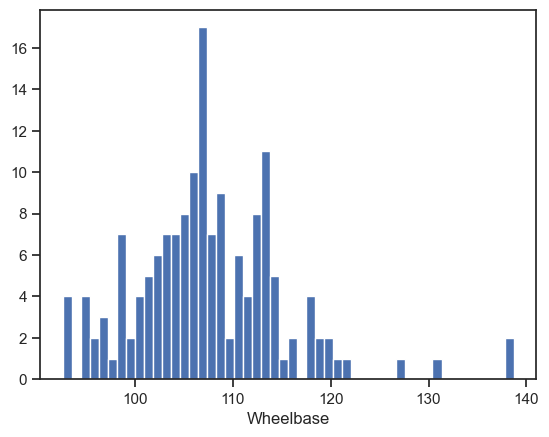

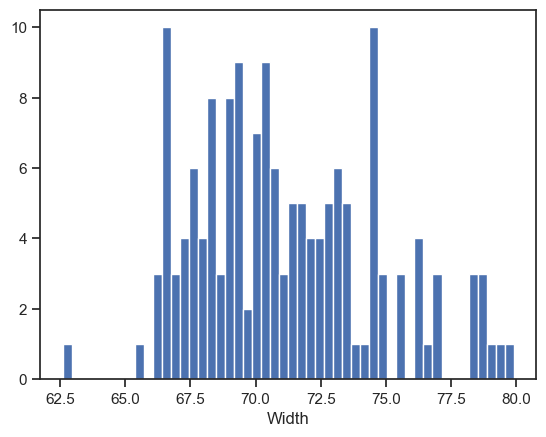

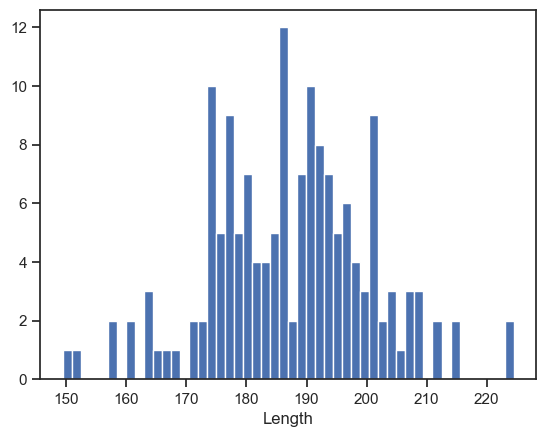

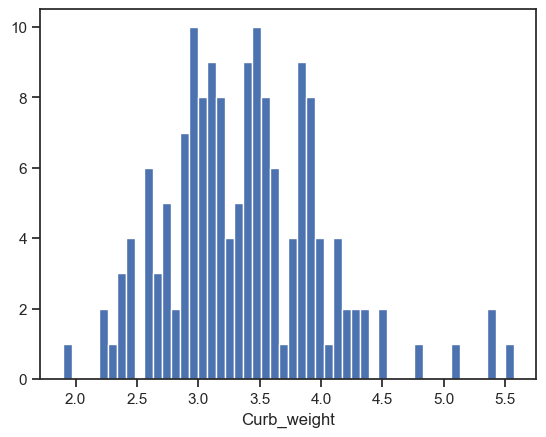

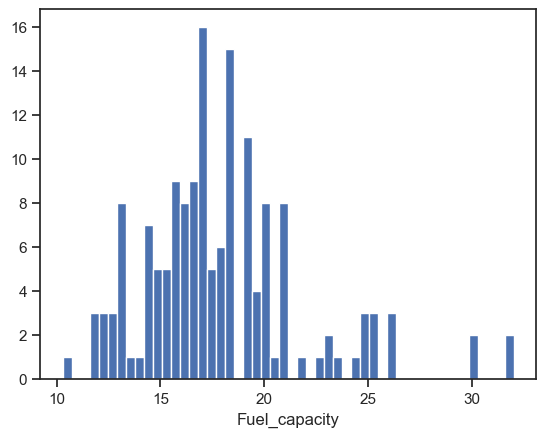

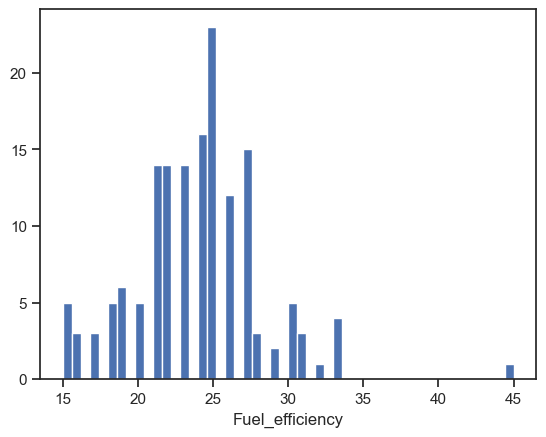

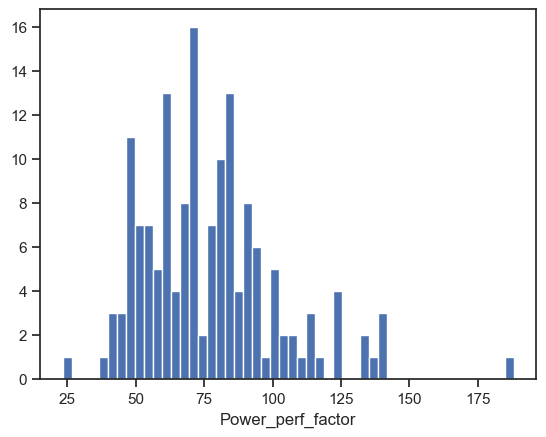

In [21]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [24]:
data_num_ResaleYear = data_num[['__year_resale_value']]
data_num_ResaleYear.head()

,__year_resale_value
0,16.360
1,19.875
2,18.225
3,29.725
4,22.255


In [25]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [26]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_ResaleYear)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [27]:
strategies=['mean', 'median', 'most_frequent']

In [28]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_ResaleYear)
    return data_num_imp[mask_missing_values_only]

In [29]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([18.07297521, 18.07297521, 18.07297521, 18.07297521, 18.07297521,
        18.07297521, 18.07297521, 18.07297521, 18.07297521, 18.07297521,
        18.07297521, 18.07297521, 18.07297521, 18.07297521, 18.07297521,
        18.07297521, 18.07297521, 18.07297521, 18.07297521, 18.07297521,
        18.07297521, 18.07297521, 18.07297521, 18.07297521, 18.07297521,
        18.07297521, 18.07297521, 18.07297521, 18.07297521, 18.07297521,
        18.07297521, 18.07297521, 18.07297521, 18.07297521, 18.07297521,
        18.07297521]))

In [30]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18,
        14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18,
        14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18,
        14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18]))

In [31]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75,
        7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75,
        7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75,
        7.75, 7.75, 7.75]))

In [1]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [34]:
data[['__year_resale_value']].describe()

,__year_resale_value
count,121.000000
mean,18.072975
std,11.453384
min,5.160000
25%,11.260000
50%,14.180000
75%,19.875000
max,67.550000


In [35]:
test_num_impute_col(data, '__year_resale_value', strategies[0])

('__year_resale_value', 'mean', 36, 18.07297520661157, 18.07297520661157)

In [36]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Vehicle_type. Тип данных object. Количество пустых значений 2, 1.27%.


In [37]:
cat_temp_data = data[['Vehicle_type']]
cat_temp_data.head()

,Vehicle_type
0,NaN
1,Passenger
2,Passenger
3,Passenger
4,Passenger


In [39]:
cat_temp_data['Vehicle_type'].unique()

array([nan, 'Passenger', 'Car'], dtype=object)

In [40]:
cat_temp_data[cat_temp_data['Vehicle_type'].isnull()].shape

(2, 1)

In [41]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Car'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Car'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Car'],
       ['Car'],
       ['Car'],
       ['Car'],
       ['Car'],
       ['Car'],
       ['Passenger'],
       ['Passe

In [42]:
np.unique(data_imp2)
# Нет пустых значений 

array(['Car', 'Passenger'], dtype=object)

In [43]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['NA'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Car'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Car'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Car'],
       ['Car'],
       ['Car'],
       ['Car'],
       ['Car'],
       ['Car'],
       ['Passenger'],
       ['Passenger'],

In [44]:
np.unique(data_imp3)

array(['Car', 'NA', 'Passenger'], dtype=object)

In [46]:
data_imp3[data_imp3=='NA'].size

2

In [47]:
# Преобразование категориальных признаков в числовые
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Passenger
1,Passenger
2,Passenger
3,Passenger
4,Passenger
...,...
152,Passenger
153,Passenger
154,Passenger
155,Passenger


In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
cat_enc['c1'].unique()

array(['Passenger', 'Car'], dtype=object)

In [50]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [51]:
# Наименования категорий в соответствии с порядковыми номерами
le.classes_

array(['Car', 'Passenger'], dtype=object)

In [52]:
cat_enc_le

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [53]:
np.unique(cat_enc_le)

array([0, 1])

In [55]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0, 1])

array(['Car', 'Passenger'], dtype=object)

In [56]:
# Использование OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

In [58]:
data_oe = data[['Vehicle_type']]
data_oe.head()

,Vehicle_type
0,NaN
1,Passenger
2,Passenger
3,Passenger
4,Passenger


In [59]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['NA'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Car'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Car'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Car'],
       ['Car'],
       ['Car'],
       ['Car'],
       ['Car'],
       ['Car'],
       ['Passenger'],
       ['Passenger'],

In [60]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],

In [61]:
np.unique(cat_enc_oe[:, 0])

array([0., 1., 2.])

In [63]:
oe.categories_

[array(['Car', 'NA', 'Passenger'], dtype=object)]

In [64]:
oe.inverse_transform(cat_enc_oe)

array([['NA'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Car'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Car'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Passenger'],
       ['Car'],
       ['Car'],
       ['Car'],
       ['Car'],
       ['Car'],
       ['Car'],
       ['Passenger'],
       ['Passenger'],

In [70]:
# Кодирование категорий наборами бинарных значений - one-hot encoding
from sklearn.preprocessing import OneHotEncoder

In [71]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [73]:
cat_enc.shape

(157, 1)

In [74]:
cat_enc_ohe.shape

(157, 2)

In [80]:
cat_enc_ohe

<157x2 sparse matrix of type '<class 'numpy.float64'>'
	with 157 stored elements in Compressed Sparse Row format>

In [81]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])

In [83]:
cat_enc.head(10)

,c1
0,Passenger
1,Passenger
2,Passenger
3,Passenger
4,Passenger
5,Passenger
6,Passenger
7,Passenger
8,Passenger
9,Passenger


In [84]:
pd.get_dummies(cat_enc).head()

,c1_Car,c1_Passenger
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [86]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Vehicle_type_Car,Vehicle_type_Passenger,Vehicle_type_nan
0,False,False,True
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False


In [87]:
# Масштабирование данных
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [90]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Price_in_thousands']])

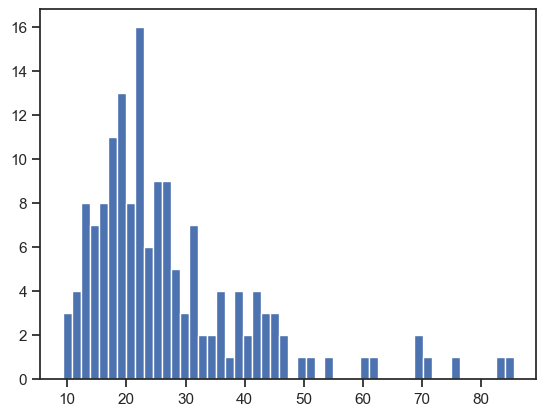

In [91]:
plt.hist(data['Price_in_thousands'], 50)
plt.show()

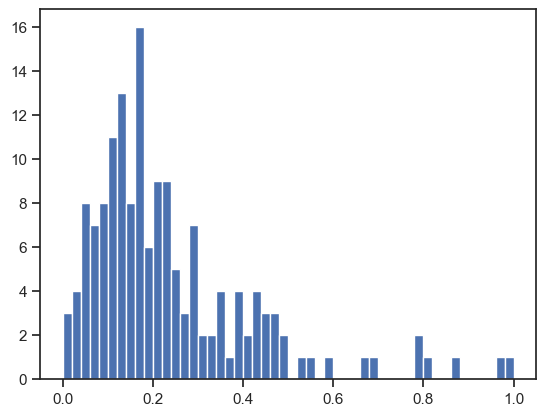

In [99]:
plt.hist(sc1_data, 50)
plt.show()

In [94]:
# Масштабирование данных на основе Z-оценки - StandardScaler
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Price_in_thousands']])

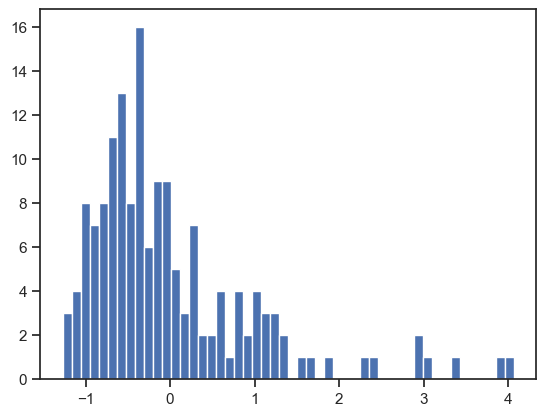

In [95]:
plt.hist(sc2_data, 50)
plt.show()